Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nctid        1759 non-null   object
 1   description  1759 non-null   object
 2   label        1759 non-null   object
dtypes: object(3)
memory usage: 41.4+ KB
None

First few rows of the dataset:
         nctid                                        description label
0  NCT02464748  MND is often referred to as amyotrophic latera...   ALS
1  NCT00362362  OBJECTIVE:||The causes of sporadic motor neuro...   ALS
2  NCT03154450  Non-invasive ventilation (NIV) use in patients...   ALS
3  NCT03487263  The objectives of this study are to determine:...   ALS
4  NCT04454892  With the development of supportive measures, t...   ALS

Number of unique labels: 5
Labels are: ['ALS' 'Obsessive Compulsive Disorder' 'Parkinson’s Disease' 'Dementia'
 'Scoliosis']

Description Length Summary:
count    1

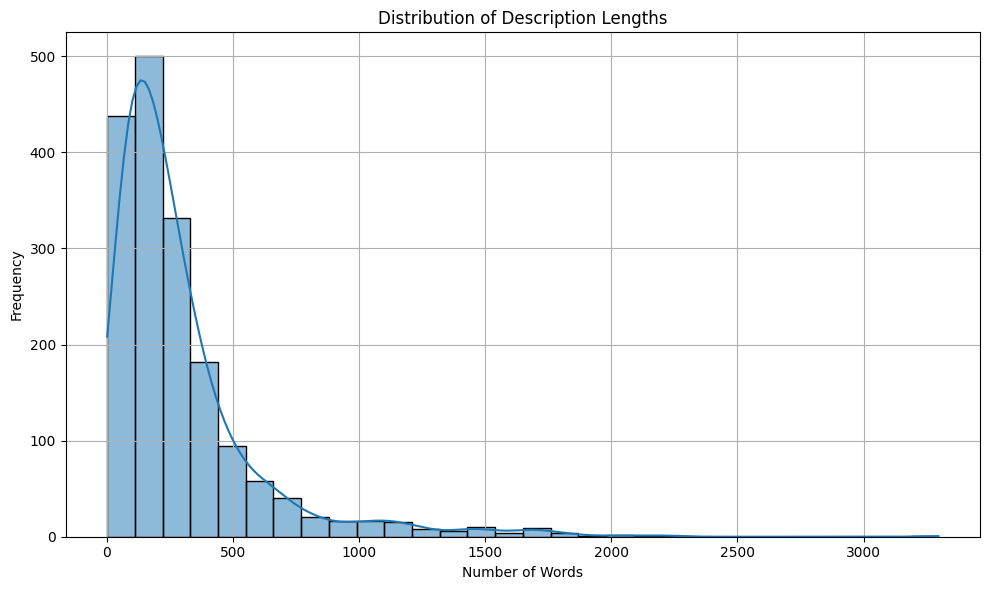

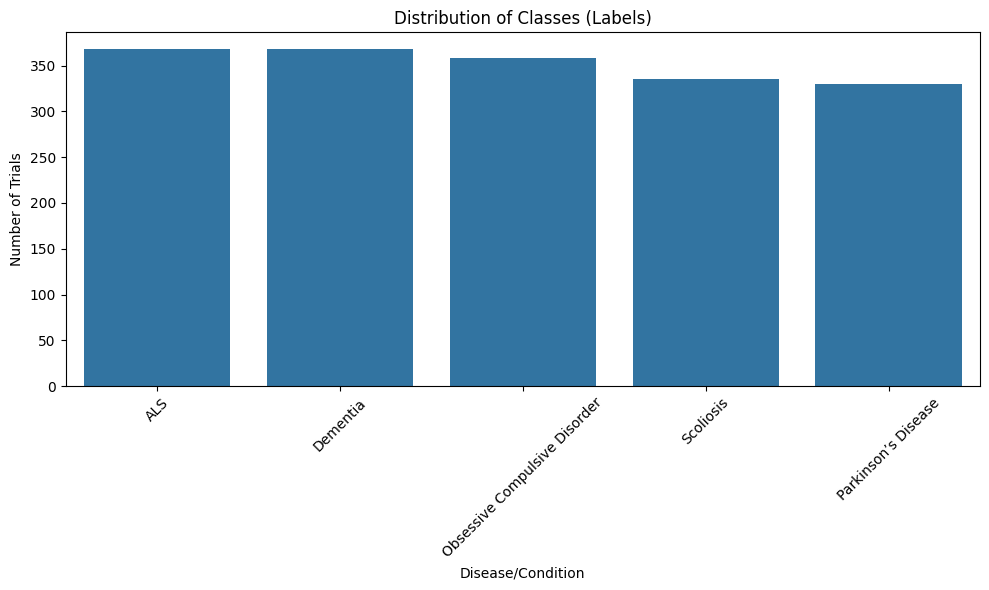

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import string
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

# Load SpaCy model for lemmatization and stopword filtering
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))

# Load dataset
df = pd.read_csv('trials.csv')

# 1. Exploratory Data Analysis (EDA)

# Basic information about the dataset
print("Dataset info:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

# 1.1 Number of unique labels
unique_labels = df['label'].nunique()
print(f"\nNumber of unique labels: {unique_labels}")
print(f"Labels are: {df['label'].unique()}")

# 1.2 Length of descriptions
df['desc_length'] = df['description'].apply(lambda x: len(str(x).split()))
print(f"\nDescription Length Summary:")
print(df['desc_length'].describe())

# Plot distribution of description lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['desc_length'], bins=30, kde=True)
plt.title("Distribution of Description Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# 1.3 Distribution of classes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.title("Distribution of Classes (Labels)")
plt.xlabel("Disease/Condition")
plt.ylabel("Number of Trials")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r"\|\|", " ", text)  # remove double pipe used as separator
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_stop]
    print (tokens[:5])
    return " ".join(tokens)
